In [1]:
import numpy as np
import pandas as pd
import datetime
from scipy.sparse import csr_matrix, dok_matrix
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns


In [2]:
stations = pd.read_csv('../data/station_data.csv')
stations = stations[~stations['Id'].isin([23, 25, 49, 69, 72])] # remove the old stations which are moved to 85, 86, 87, 88, 89
stations['City'].replace(['San Francisco', 'Redwood City', 'Palo Alto', 'Mountain View', 'San Jose'], [94107, 94063, 94301, 94041, 95113], inplace=True)
stations.rename(columns={'Id': 'id_station', 'City': 'Zip'}, inplace=True)
stations.drop('Name', axis=1, inplace=True)
print(stations.columns)
num_stations = stations['id_station'].count()
station_ids = stations['id_station'].values
sid2id = {station_ids[i]: i for i in range(num_stations)}
stations.head()
print(num_stations)

Index(['id_station', 'Lat', 'Long', 'Dock Count', 'Zip'], dtype='object')


,id_station,Lat,Long,Dock Count,Zip
0,2,37.329732,-121.901782,27,95113
1,3,37.330698,-121.888979,15,95113
2,4,37.333988,-121.894902,11,95113
3,5,37.331415,-121.893200,19,95113
4,6,37.336721,-121.894074,15,95113


71


,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,Zip,id_date
0,2014-09-01,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,...,8.0,16.0,7.0,20.0,0.0,0.0,NaN,290.0,94107,0
1,2014-09-02,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,...,7.0,21.0,8.0,NaN,0.0,5.0,NaN,290.0,94107,1
2,2014-09-03,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,...,10.0,21.0,8.0,24.0,0.0,4.0,NaN,276.0,94107,2
3,2014-09-04,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,...,8.0,22.0,8.0,25.0,0.0,5.0,NaN,301.0,94107,3
4,2014-09-05,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,...,7.0,18.0,8.0,32.0,0.0,4.0,NaN,309.0,94107,4


Date                            0
Max TemperatureF                4
Mean TemperatureF               4
Min TemperatureF                4
Max Dew PointF                 50
MeanDew PointF                 50
Min DewpointF                  50
Max Humidity                   50
Mean Humidity                  50
Min Humidity                   50
Max Sea Level PressureIn        1
Mean Sea Level PressureIn       1
Min Sea Level PressureIn        1
Max VisibilityMiles             5
Mean VisibilityMiles            5
Min VisibilityMiles             5
Max Wind SpeedMPH               1
Mean Wind SpeedMPH              1
Max Gust SpeedMPH             541
PrecipitationIn                 1
CloudCover                      1
Events                       1538
WindDirDegrees                  1
Zip                             0
id_date                         0
dtype: int64


0.2964383561643836

94041


94063


94107


94301


95113


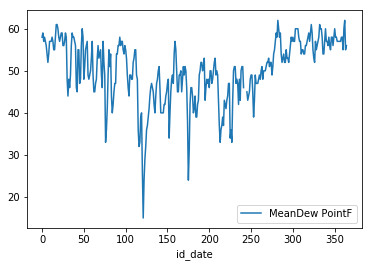

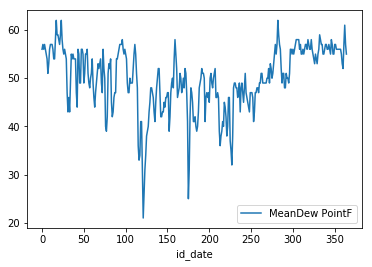

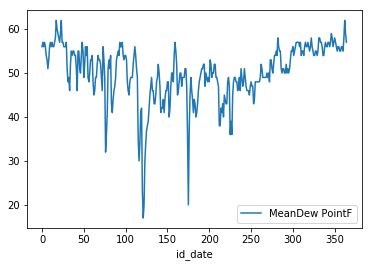

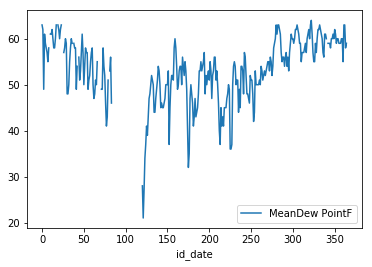

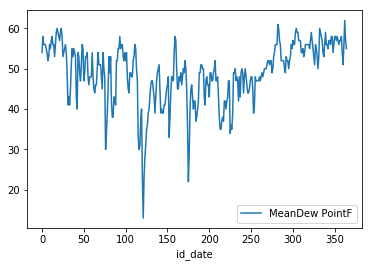

In [3]:
weather = pd.read_csv('../data/weather_data.csv')
weather['Date'] = pd.to_datetime(weather['Date'], format='%d/%m/%Y')
list_date = weather['Date'].dt.date
min_date, max_date = list_date.min(), list_date.max()
num_days = (max_date - min_date).days + 1
map_date2id = {(min_date+ datetime.timedelta(days=idx)): idx for idx in range(num_days)}
weather['id_date'] = [map_date2id[date] for date in list_date]
weather.head()
print(weather.isnull().sum())
len(weather[np.isnan(weather['Max Gust SpeedMPH'])]) / len(weather)
for zip_code, weather_city in weather.groupby('Zip'):
    print(zip_code)
    weather_city.plot.line(x='id_date', y='MeanDew PointF')
#     weather_city.plot.line(x='id_date', y='MeanDew PointF')
#     weather_city.plot.line(x='id_date', y='Max Gust SpeedMPH')

Example after filling NaN values
94041
Date                         0
Max TemperatureF             0
Mean TemperatureF            0
Min TemperatureF             0
Max Dew PointF               0
MeanDew PointF               0
Min DewpointF                0
Max Humidity                 0
Mean Humidity                0
Min Humidity                 0
Max Sea Level PressureIn     0
Mean Sea Level PressureIn    0
Min Sea Level PressureIn     0
Max VisibilityMiles          0
Mean VisibilityMiles         0
Min VisibilityMiles          0
Max Wind SpeedMPH            0
Mean Wind SpeedMPH           0
PrecipitationIn              0
CloudCover                   0
Events                       0
WindDirDegrees               0
Zip                          0
id_date                      0
dtype: int64


94063
Date                         0
Max TemperatureF             0
Mean TemperatureF            0
Min TemperatureF             0
Max Dew PointF               0
MeanDew PointF               0
Min DewpointF                0
Max Humidity                 0
Mean Humidity                0
Min Humidity                 0
Max Sea Level PressureIn     0
Mean Sea Level PressureIn    0
Min Sea Level PressureIn     0
Max VisibilityMiles          0
Mean VisibilityMiles         0
Min VisibilityMiles          0
Max Wind SpeedMPH            0
Mean Wind SpeedMPH           0
PrecipitationIn              0
CloudCover                   0
Events                       0
WindDirDegrees               0
Zip                          0
id_date                      0
dtype: int64


94107
Date                         0
Max TemperatureF             0
Mean TemperatureF            0
Min TemperatureF             0
Max Dew PointF               0
MeanDew PointF               0
Min DewpointF                0
Max Humidity                 0
Mean Humidity                0
Min Humidity                 0
Max Sea Level PressureIn     0
Mean Sea Level PressureIn    0
Min Sea Level PressureIn     0
Max VisibilityMiles          0
Mean VisibilityMiles         0
Min VisibilityMiles          0
Max Wind SpeedMPH            0
Mean Wind SpeedMPH           0
PrecipitationIn              0
CloudCover                   0
Events                       0
WindDirDegrees               0
Zip                          0
id_date                      0
dtype: int64


94301
Date                         0
Max TemperatureF             0
Mean TemperatureF            0
Min TemperatureF             0
Max Dew PointF               0
MeanDew PointF               0
Min DewpointF                0
Max Humidity                 0
Mean Humidity                0
Min Humidity                 0
Max Sea Level PressureIn     0
Mean Sea Level PressureIn    0
Min Sea Level PressureIn     0
Max VisibilityMiles          0
Mean VisibilityMiles         0
Min VisibilityMiles          0
Max Wind SpeedMPH            0
Mean Wind SpeedMPH           0
PrecipitationIn              0
CloudCover                   0
Events                       0
WindDirDegrees               0
Zip                          0
id_date                      0
dtype: int64


95113
Date                         0
Max TemperatureF             0
Mean TemperatureF            0
Min TemperatureF             0
Max Dew PointF               0
MeanDew PointF               0
Min DewpointF                0
Max Humidity                 0
Mean Humidity                0
Min Humidity                 0
Max Sea Level PressureIn     0
Mean Sea Level PressureIn    0
Min Sea Level PressureIn     0
Max VisibilityMiles          0
Mean VisibilityMiles         0
Min VisibilityMiles          0
Max Wind SpeedMPH            0
Mean Wind SpeedMPH           0
PrecipitationIn              0
CloudCover                   0
Events                       0
WindDirDegrees               0
Zip                          0
id_date                      0
dtype: int64


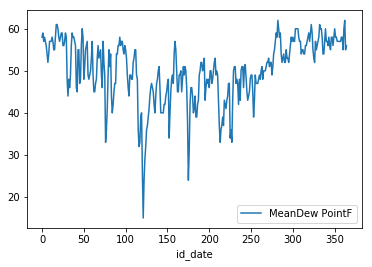

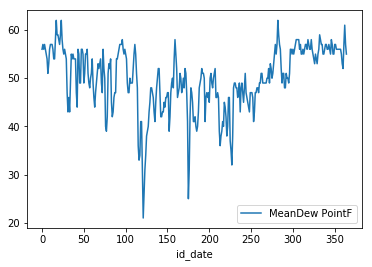

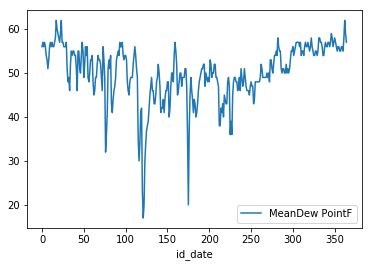

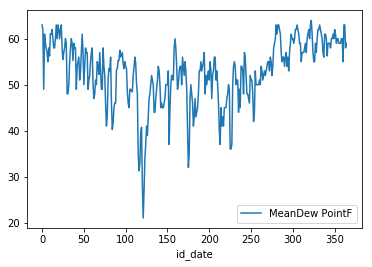

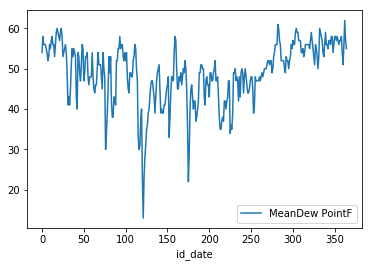

In [4]:
# preprocess the weather data
# drop column Max Gust SpeedMPH because of exsiting many NaN values
weather.drop('Max Gust SpeedMPH', axis=1, inplace=True)
# Column 'Events' includes categorical values, NaN value means the weather is normal, no rain, no fog...
weather['Events'].fillna('Normal', inplace=True)

# Fill NaN values of each reamaining columns
for col_name in weather.columns:
    if col_name not in ['Date', 'id_date', 'Zip', 'Events']:
        ids_nan = weather[col_name].index[weather[col_name].apply(np.isnan)]
        for idx in ids_nan:
            date = weather['id_date'][idx]
            cities = weather[weather['id_date'] == date]
            weather.at[idx, col_name] = cities[col_name].dropna().mean()

print('Example after filling NaN values')
dict_weather_cities = dict()
for zip_code, weather_city in weather.groupby('Zip'):
    print(zip_code)
    print(weather_city.isnull().sum())
    dict_weather_cities[zip_code] = weather_city
    weather_city.plot.line(x='id_date', y='MeanDew PointF')

71 71


,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type
0,913460,2015-08-31 23:26:00,50,2015-08-31 23:39:00,70,Subscriber
1,913459,2015-08-31 23:11:00,31,2015-08-31 23:28:00,27,Subscriber
2,913455,2015-08-31 23:13:00,47,2015-08-31 23:18:00,64,Subscriber
3,913454,2015-08-31 23:10:00,10,2015-08-31 23:17:00,8,Subscriber
4,913453,2015-08-31 23:09:00,51,2015-08-31 23:22:00,60,Customer


0.016666666666666666 4798.316666666667


Percentile of trips < 1h:  97.3522593470017


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f951e4b9358>]],
      dtype=object)

Percentile of subscriber type which is subscriber:  87.59455712393866


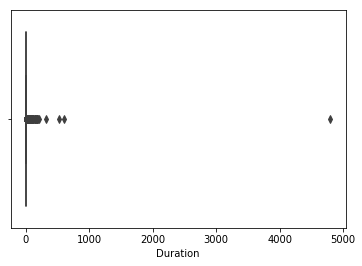

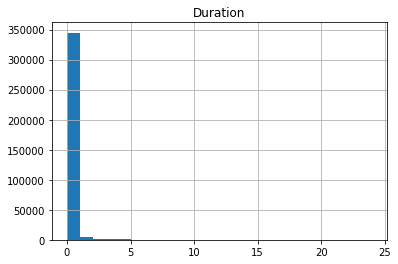

In [5]:
trips = pd.read_csv('../data/trip_data.csv')
# replace the old stations 23, 25, 49, 69, 72
trips['Start Station'].replace([23, 25, 49, 69, 72], [85, 86, 87, 88, 89], inplace=True)
trips['End Station'].replace([23, 25, 49, 69, 72], [85, 86, 87, 88, 89], inplace=True)
print(len(trips['Start Station'].unique()), len(trips['End Station'].unique()))

#convert to datetime
trips['Start Date'] = pd.to_datetime(trips['Start Date'], format='%d/%m/%Y %H:%M')
trips['End Date'] = pd.to_datetime(trips['End Date'], format='%d/%m/%Y %H:%M')
trips.head()
# calculate duration of trips
trips['Duration'] = trips['End Date'] - trips['Start Date']
trips['Duration'] = trips['Duration'].map(lambda x: x.total_seconds()/3600)
print(trips['Duration'].min(), trips['Duration'].max())
sns.boxplot(x=trips['Duration'])

trips = trips[trips['Duration'] < 1000] # remove outlier
print('Percentile of trips < 1h: ', len(trips[trips['Duration'] <= 1])/len(trips)*100)
# draw histogram of duration of trips
durations = trips.copy()
durations = durations[durations['Duration'] < 24]
durations.hist(column='Duration', bins=24)

print('Percentile of subscriber type which is subscriber: ', len(trips[trips['Subscriber Type'] == 'Subscriber'])/len(trips)*100)

Total hours from  2014-09-01 00:00:00  to  2015-08-31 23:00:00 : 8760
198154
174112
198154
49 8338
35 8223
423806
9 1303
31 588
46 4589
22 8144
65 6120
   id_station  id_date  dow  id_hour  hour  num_trips_start  \
0          61      347    4     8338    10              2.0   
1          13      204    1     4904     8              1.0   
2          10      103    5     2486    14              1.0   
3          70      169    1     4061     5              0.0   
4          67       96    5     2327    23              1.0   

   hours_since_last_start  num_trips_end  hours_since_last_end  net_rate  
0                       1            3.0                     1       1.0  
1                      14            1.0                    13       0.0  
2                      24            0.0                     6      -1.0  
3                       5            1.0                     7       1.0  
4                       1            2.0                     2       1.0  
[0.] [0.] [0.]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f951e465e10>]],
      dtype=object)

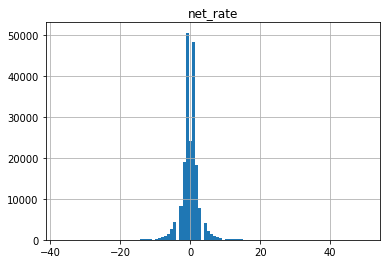

In [6]:
min_date = trips['Start Date'].min()
min_date = min_date.replace(minute=0, second=0)
max_date = trips['End Date'].max()
max_date = max_date.replace(minute=0, second=0)
time_delta = max_date - min_date
total_hours = int(time_delta.total_seconds() / 3600) + 1
print('Total hours from ', min_date, ' to ', max_date, ': %d' %total_hours)

# create matrix start station, end station, duration of trips
start_matrix = dok_matrix((num_stations, total_hours))
end_matrix = dok_matrix((num_stations, total_hours))
# duration_matrix = dok_matrix((num_stations, total_hours))
for idx, row in trips.iterrows():
    start_station_id = row['Start Station']
    start_date = row['Start Date'].replace(minute=0, second=0)
    delta = start_date - min_date
    start_id_col = int(delta.total_seconds() / 3600)
    start_id_row = sid2id[start_station_id]
    start_matrix[start_id_row, start_id_col] += 1
    
    end_station_id = row['End Station']
    end_date = row['End Date'].replace(minute=0, second=0)
    delta = end_date - min_date
    end_id_col = int(delta.total_seconds() / 3600)
    end_id_row = sid2id[end_station_id]
    end_matrix[end_id_row, end_id_col] += 1
    
start_keys = list(start_matrix.keys())
end_keys = list(end_matrix.keys())
total_keys = set([(row, col) for row in range(num_stations) for col in range(total_hours)])
positive_output_keys = set(start_keys + end_keys)
negative_output_keys = total_keys - positive_output_keys
positive_output_keys = list(positive_output_keys)
negative_output_keys = list(negative_output_keys)

# output considered as predicted variables, and only consider value at key in list postive_output_keys
output = end_matrix - start_matrix
print(len(positive_output_keys))
print(len(output.nonzero()[0]))

# construct table of predicted values
map_idhour2date = dict()
for id_hour in range(total_hours):
    map_idhour2date[id_hour] = min_date + datetime.timedelta(hours=id_hour)
postitive_stations_hour = list()
negative_stations_hour = list()
id_count = 0
dict_col_nonzero_start = {row: start_matrix[row].nonzero()[1] for row in range(start_matrix.shape[0])}
dict_col_nonzero_end = {row: end_matrix[row].nonzero()[1] for row in range(end_matrix.shape[0])}
# for row, col in positive_output_keys:
for keys, station_hour in [([positive_output_keys, postitive_stations_hour]), (negative_output_keys, negative_stations_hour)]:
    print(len(keys))
    for row, col in keys:
        if id_count%100000 == 0:
            print(row, col)
        id_count += 1
        id_station = station_ids[row]
        date = map_idhour2date[col]
        id_date = map_date2id[date.date()]
        hour = date.hour
        dow = date.weekday() # day of week
        hours_since_last_start = 0
        hours_since_last_end = 0
        from time import time
#     t1 = time()
        col_nonzero_start = dict_col_nonzero_start[row] #start_matrix[row].nonzero()
#     t2 = time()
        if min(col_nonzero_start) < col:
            idx = np.where(col_nonzero_start < col)[0][-1]
            hours_since_last_start = col - col_nonzero_start[idx]
#     t3 = time()
#     print(t2-t1, t3-t2)
        col_nonzero_end = dict_col_nonzero_end[row] #end_matrix[row].nonzero()
        if min(col_nonzero_end) < col:
            idx = np.where(col_nonzero_end < col)[0][-1]
            hours_since_last_end = col - col_nonzero_end[idx]
    
        station_hour.append([id_station, id_date, dow, col, hour, start_matrix[row, col], hours_since_last_start, end_matrix[row, col], hours_since_last_end, output[row, col]])
df_positive = pd.DataFrame(postitive_stations_hour, columns=['id_station', 'id_date', 'dow', 'id_hour', 'hour', 'num_trips_start', 'hours_since_last_start', 'num_trips_end', 'hours_since_last_end', 'net_rate'])
df_negative = pd.DataFrame(negative_stations_hour, columns=['id_station', 'id_date', 'dow', 'id_hour', 'hour', 'num_trips_start', 'hours_since_last_start', 'num_trips_end', 'hours_since_last_end', 'net_rate'])
print(df_positive.head())
print(df_negative['num_trips_start'].unique(), df_negative['num_trips_end'].unique(), df_negative['net_rate'].unique())
df_positive.hist(column='net_rate', bins=100)

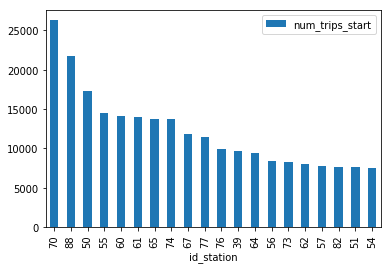

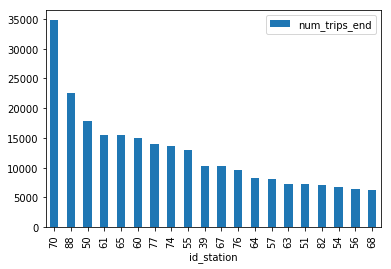

In [7]:
# Which stations the bikes were taken or returned most?
group = df_positive.groupby('id_station').sum()
group.reset_index(level='id_station', inplace=True)
top_20_station_taken_most = group.sort_values(by='num_trips_start', ascending=False)[:20]
top_20_station_returned_most = group.sort_values(by='num_trips_end', ascending=False)[:20]
top_20_station_taken_most.plot.bar(x='id_station', y='num_trips_start', colormap='tab10')
top_20_station_returned_most.plot.bar(x='id_station', y='num_trips_end', colormap='tab10')

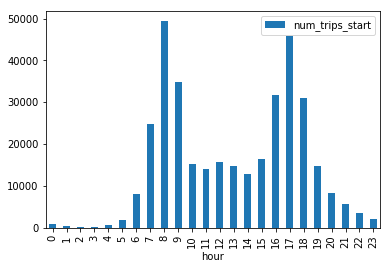

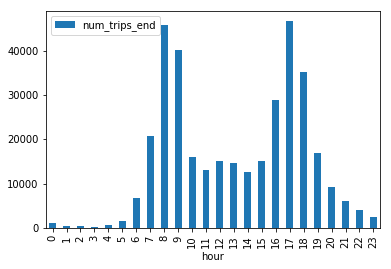

In [8]:
# which hour in day that the bikes were taken or returned most?
group = df_positive.groupby('hour').sum()
group.reset_index(level='hour', inplace=True)
group.sort_values(by='hour', inplace=True)
group.plot.bar(x='hour', y='num_trips_start', colormap='tab10')
group.plot.bar(x='hour', y='num_trips_end', colormap='tab10')

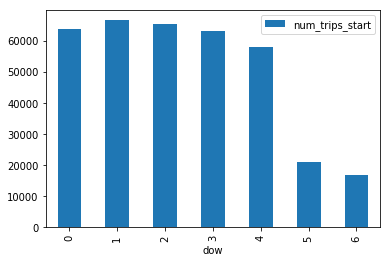

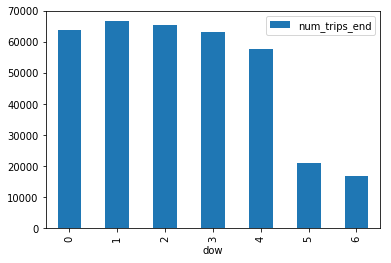

In [9]:
# which day of week that the bikes were taken or returned most?
group = df_positive.groupby('dow').sum()
group.reset_index(level='dow', inplace=True)
group.sort_values(by='dow', inplace=True)
group.plot.bar(x='dow', y='num_trips_start', colormap='tab10')
group.plot.bar(x='dow', y='num_trips_end', colormap='tab10')

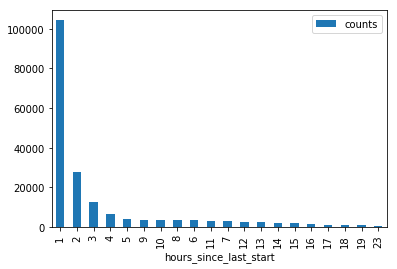

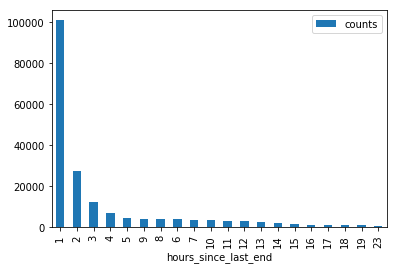

In [10]:
# how frequently stations were taken or returned again?
group1 = df_positive.groupby('hours_since_last_start').size().reset_index(name='counts')
group2 = df_positive.groupby('hours_since_last_end').size().reset_index(name='counts')
top_group1 = group1.sort_values(by='counts', ascending=False)[:20]
top_group2 = group2.sort_values(by='counts', ascending=False)[:20]
top_group1.plot.bar(x='hours_since_last_start', y='counts', colormap='tab10')
top_group2.plot.bar(x='hours_since_last_end', y='counts', colormap='tab10')

In [11]:
# Join all tables to one table
df = df_positive.append(df_negative)
df = df.merge(stations, on=['id_station'], how='left')
df = df.merge(weather, on=['id_date', 'Zip'], how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621960 entries, 0 to 621959
Data columns (total 36 columns):
id_station                   621960 non-null int64
id_date                      621960 non-null int64
dow                          621960 non-null int64
id_hour                      621960 non-null int64
hour                         621960 non-null int64
num_trips_start              621960 non-null float64
hours_since_last_start       621960 non-null int64
num_trips_end                621960 non-null float64
hours_since_last_end         621960 non-null int64
net_rate                     621960 non-null float64
Lat                          621960 non-null float64
Long                         621960 non-null float64
Dock Count                   621960 non-null int64
Zip                          621960 non-null int64
Date                         621960 non-null datetime64[ns]
Max TemperatureF             621960 non-null float64
Mean TemperatureF            621960 non-null float64

In [12]:
def lag_feature(table, lag_hours, col_name, keys=['id_hour', 'id_station']):
    temp = table[keys + [col_name]]
    for lag_hour in lag_hours:
        shifted = temp.copy()
        shifted.columns = keys + [col_name + '_lag_%d' %lag_hour]
        shifted[keys[0]] += lag_hour
        table = table.merge(shifted, on=keys, how='left')
    return table

In [13]:
# create dataset for training and test
# First, get the values in the past of some features which can not be observed at the present: num_trips_start, num_trips_end
print('Get the observed features')
df = lag_feature(df, [1,2,3] + list(range(24, 24*7, 24)), 'num_trips_start')
df = lag_feature(df, [1,2,3] + list(range(24, 24*7, 24)), 'num_trips_end')
df.drop(['num_trips_start', 'num_trips_end'], axis=1, inplace=True)
# Remove the first week of dataset because we considered the length of lag as 7 days (one week)
df = df[df['id_date'] >= 7]
# drop columns which are keys of tables
df.drop(['id_station', 'id_date', 'Date'], axis=1, inplace=True)
# Create one-hot encoding for categorical columns
print('Create one-hot encoding for categorical columns')
categorical_columns = ['hour', 'dow', 'CloudCover', 'Events', 'Zip']
for cate_col in categorical_columns:
    df[cate_col] = pd.Categorical(df[cate_col])
    df_one_hot = pd.get_dummies(df[cate_col], prefix=cate_col)
    df = pd.concat([df, df_one_hot], axis=1)
df.drop(categorical_columns, axis=1, inplace=True)
df.to_pickle('../data/matrix_features.pkl')
print(df.info())


Get the observed features
Create one-hot encoding for categorical columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 610032 entries, 0 to 621959
Data columns (total 95 columns):
id_hour                      610032 non-null int64
hours_since_last_start       610032 non-null int64
hours_since_last_end         610032 non-null int64
net_rate                     610032 non-null float64
Lat                          610032 non-null float64
Long                         610032 non-null float64
Dock Count                   610032 non-null int64
Max TemperatureF             610032 non-null float64
Mean TemperatureF            610032 non-null float64
Min TemperatureF             610032 non-null float64
Max Dew PointF               610032 non-null float64
MeanDew PointF               610032 non-null float64
Min DewpointF                610032 non-null float64
Max Humidity                 610032 non-null float64
Mean Humidity                610032 non-null float64
Min Humidity                